## Defining the Research Questions and Research Plan

### Research Aim (Exploratory):
- A review of literature has shown that housing prices are often modeled using regression models, whereby structural and locational attributes are used to explain variances in housing prices. This is justified on the basis that houses often share similar strucutral features with their nearby properties (Basu & Thibodeau, 1998). In addition, poverty index has also been used to identify at-risk housing (Margulis, 1998). Previous research on housing price prediction has taken an econometric approach, ordinary least squares (OLS). However, recent research on house prediction in Sandiago has shown that machine learning algorithms, espeicially Random Forest have yielded superior performance than the traditional approach. The current research aims to extend the literature by examining whether compared to other classification algorithms, Random Forest will perform better in explaining housing price variances in London. The study also aims to explore the predictive power of a series of independent variables: deprivation index, quality rating, distance to station, the venue categories and the geographical coordinates of the nearby properties.

    - Candiate Independent Variable: Nearby Venue Category, Geographical coordinates of Nearby Venue, Index of Multiple Deprivation, Quality rating, Distance to Station
    - Dependent Variable: Housing Price Categories
    
### Method:
   ####  Data Preparation Stage:
        -- Importing pre-existing datasets
              - London_house_price dataset:
                  - relevant features:
                      1. London house price by ward code (numerical)
                      2. Index of Multiple Deprivation (numerical)
                      3. Distance to Station (numerical)
                      4. Quality Rating (numerical)
                      
              - London geographical coordinates _ downloaded from public database 
                  - relevant features:
                      1. Latitude by ward code (numerical)
                      2. Longitude by ward code (numerical)
                     
        -- Data Wangling:
              - Merge the three dataframe with the primary key: ward code 
              - Clean and simplify the dataset
        -- Exploratory Data Analysis:
              - Explore the normality of target variable__ Housing Price
                 - the following steps will be conducted if necessary:
                    1. log-transformation 
                    2. Normalisation for identifying outliers 
                    3. Outliers removal
              - Examine the association between housing price and the three candidate feature variables
                   1. Index of Multiple Deprivation
                   2. Distance to Station
                   3. Quality Rating
                       - Evaluation matrix or each variable: 
                           - correlation coefficient
                           - statistical significance (p<0.05)
         
       -- Further data sourcing:
            - Fetch venue category data for each geographical coordinate using Foursquare API
       -- Data preparation for machine learning
           - onehot-encoding for categorical variables (nearby venue categories)
           - converting housing price (numerical) to categorical variables (low, medium, high)
           - split data into features and lables
           - split data into training and testing sets

   #### Modelling Stage
        1.Establish baseline prediction accuracy : Null Accuracy

        2.Apply RandomForest classifier to the training set using 5-fold cross-validation method

        3.Calculate the mean accuracy score 

        4.Compute the feature importance score

        5.Remove redundant features 

        6.Apply the RandomForest classifier again using the important features

        7.Scoring the RandomFroest classifier again using cross-validation.

        8.Apply K-NearestNeighbours and select the best K with GridSearchCV

        9.Apply SupportVectorMachine and select the best regulation value

        10.Apply multiclas logistic regression and select the regulation value

        11.Apply the above models to the test set

        12.Generate confusion matrix for each model 

### Results Interpretation and Discussion          
   

In [4]:
## Importing packages
from geopy.geocoders import Nominatim 
import requests
import json 
import pandas as pd
import numpy as np


## Importing london house price and geographical coordinate datasets

In [5]:
geo_data=pd.read_csv('london_postcodes.csv')
hp_data=pd.read_csv('london_house_price.csv')

## Data Wangling

In [6]:
hp_data.head()

,Code,Ward_name,Borough,Year,Measure,Value
0,E09000001,City of London,City of London,Year ending Dec 1995,Median,-
1,E05000026,Abbey,Barking and Dagenham,Year ending Dec 1995,Median,"53,000"
2,E05000027,Alibon,Barking and Dagenham,Year ending Dec 1995,Median,"45,000"
3,E05000028,Becontree,Barking and Dagenham,Year ending Dec 1995,Median,"49,000"
4,E05000029,Chadwell Heath,Barking and Dagenham,Year ending Dec 1995,Median,"59,000"


In [7]:
hp_data.groupby('Code').count().head()

,Ward_name,Borough,Year,Measure,Value
Code,,,,,
E05000026,267,267,267,267,267
E05000027,267,267,267,267,267
E05000028,267,267,267,267,267
E05000029,267,267,267,267,267
E05000030,267,267,267,267,267


Each area code seems to have multiple corresponding data points. We now need to find out ways to reduce it to one datapoint per each area code as this is a necessary condition for later merging.

In [8]:
#Checking data within the first areacode 
hp_data[hp_data['Code']=='E05000026']

,Code,Ward_name,Borough,Year,Measure,Value
1,E05000026,Abbey,Barking and Dagenham,Year ending Dec 1995,Median,"53,000"
631,E05000026,Abbey,Barking and Dagenham,Year ending Mar 1996,Median,"50,000"
1261,E05000026,Abbey,Barking and Dagenham,Year ending Jun 1996,Median,"50,000"
1891,E05000026,Abbey,Barking and Dagenham,Year ending Sep 1996,Median,"53,500"
2521,E05000026,Abbey,Barking and Dagenham,Year ending Dec 1996,Median,"49,998"
3151,E05000026,Abbey,Barking and Dagenham,Year ending Mar 1997,Median,"46,995"
3781,E05000026,Abbey,Barking and Dagenham,Year ending Jun 1997,Median,"45,000"
4411,E05000026,Abbey,Barking and Dagenham,Year ending Sep 1997,Median,"43,125"
5041,E05000026,Abbey,Barking and Dagenham,Year ending Dec 1997,Median,"49,000"
5671,E05000026,Abbey,Barking and Dagenham,Year ending Mar 1998,Median,"51,500"


In [9]:
hp_data.Measure.unique()

array(['Median', 'Mean', 'Sales'], dtype=object)



It seems like each area code has three outcome measures and each of them were measured at differnt timepoints. We will now drop the irrelvant data as we are only interested in the most recent data and its corresonding mean value.

In [10]:
#selecting data in the most recent timeframe
hp_data=hp_data[hp_data['Year']=='Year ending Dec 2017']
#selecting the mean values
hp_data=hp_data[hp_data['Measure']=='Mean']

In [11]:
#Removing the ''
hp_data['Value']=hp_data['Value'].replace(',','',regex=True)

#Converting the Value column into float and drop the missing values
hp_data['Value']=pd.to_numeric(hp_data['Value'],errors='coerce')
hp_data=hp_data.dropna()

#checking for any unwanted duplicates in the code columns
mask=hp_data.groupby('Code').count()['Value']!=1
hp_data.groupby('Code').count()['Value'][mask]

Series([], Name: Value, dtype: int64)

In [12]:
#selecting relevant columns in the london geo dataset
filtered_geo=geo_data[['Latitude','Longitude','District','Ward','Ward Code','Distance to station','Index of Multiple Deprivation', 'Quality']]

#renaming the code column for inner join
filtered_geo=filtered_geo.rename(columns={'Ward Code':'Code'})


#merging the two datasets using inner join
merged_df=pd.merge(filtered_geo,
         hp_data[['Code','Value']],
         on='Code')

In [13]:
merged_df.shape, len(merged_df.Ward.unique())


((273567, 9), 527)

The dataset seems quite lengthy. Let's see if there is anything we could do about it.

In [14]:
merged_df.head()

,Latitude,Longitude,District,Ward,Code,Distance to station,Index of Multiple Deprivation,Quality,Value
0,51.401546,0.015415,Bromley,Bromley Town,E05000109,0.218257,20532,1,469534.0
1,51.406333,0.015208,Bromley,Bromley Town,E05000109,0.253666,10169,1,469534.0
2,51.400057,0.016715,Bromley,Bromley Town,E05000109,0.044559,20532,1,469534.0
3,51.404543,0.014195,Bromley,Bromley Town,E05000109,0.462939,19350,1,469534.0
4,51.401392,0.014948,Bromley,Bromley Town,E05000109,0.227664,20532,1,469534.0


It seems like the latitude and longitude values are very precise, which to some extent, is advantageous, as it narrows down  to very specific areas. However, if these areas are too specific, as it might result in duplications and significant computation time when we fetch its nearby venue data.Therefore, we shall try shortening it further by rounding up to 2 decimal places as this is also the standard format used in Foursquare API.

In [15]:
merged_df=merged_df.round(2)
len(merged_df.groupby(['Latitude','Longitude']).count())

1809

Now this is much shorter.

In [16]:
merged_df.groupby(['Latitude','Longitude']).count().head()

District  Ward  Code  Distance to station  \
Latitude Longitude                                              
51.29    0.06              1     1     1                    1   
         0.07              2     2     2                    2   
51.30    0.02             14    14    14                   14   
         0.03              1     1     1                    1   
         0.04              8     8     8                    8   

                    Index of Multiple Deprivation  Quality  Value  
Latitude Longitude                                                 
51.29    0.06                                   1        1      1  
         0.07                                   2        2      2  
51.30    0.02                                  14       14     14  
         0.03                                   1        1      1  
         0.04                                   8        8      8

Some sets of geographical coordinates seems to have multiple values. We shall now calculate the mean value of Distance to station,Index of Multiple Deprivation and housing price for each set of geogrpahical coordinates.

In [38]:
grouped_df=merged_df.groupby(['Latitude','Longitude']).mean().reset_index()
grouped_df.isnull().values.any()

False

In [18]:
grouped_df.groupby(['Latitude','Longitude']).count().head()

Distance to station  Index of Multiple Deprivation  \
Latitude Longitude                                                       
51.29    0.06                         1                              1   
         0.07                         1                              1   
51.30    0.02                         1                              1   
         0.03                         1                              1   
         0.04                         1                              1   

                    Quality  Value  
Latitude Longitude                  
51.29    0.06             1      1  
         0.07             1      1  
51.30    0.02             1      1  
         0.03             1      1  
         0.04             1      1

Now we have merged and shortened the length of the housing price and london geo dataset. Before moving on to source venue data, we shall now carry out exploratory data analysis on the existing feature and target variables for feature selection.

### Exploratory Data Analysis

Existing candidate feature variables: Distance to Station,Index of Multiple Deprivation, Quality Rating

In [19]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
#descriptive stats summary of house prices
grouped_df['Value'].describe()

count    1.809000e+03
mean     5.760560e+05
std      3.300926e+05
min      2.597843e+05
25%      3.915780e+05
50%      5.045091e+05
75%      6.296551e+05
max      3.592899e+06
Name: Value, dtype: float64

It seems that the minimum prie is larger than zero, therefore, no additional filtering is needed for now. Let's move on examining its distribution pattern.

C:\Users\helen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


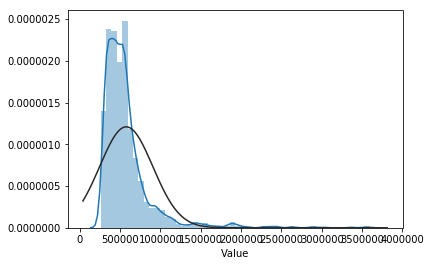

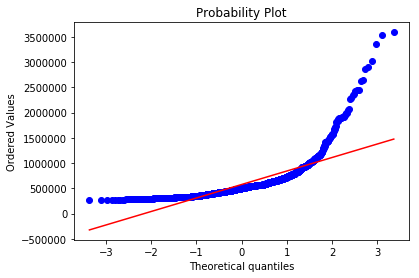

In [22]:
# histogram and normal probability plot
sns.distplot(grouped_df['Value'],fit=norm)
fig=plt.figure()
res=stats.probplot(grouped_df['Value'],plot=plt)

From the above distribution plot, we could see the price values deviate from normal distribution with positive skewness and high peakedness. Let's find out more about it.

In [23]:

print("Skewness: %f" % grouped_df['Value'].skew())
print("Kurtosis: %f" % grouped_df['Value'].kurt())

Skewness: 3.790724
Kurtosis: 20.985509


The skewness is quite high.A highly skewed data will affect the prediction result greatly. To reduce the skewness, we will first log-transform the data. 


C:\Users\helen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


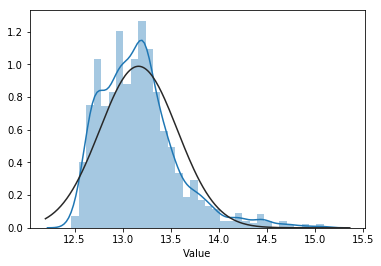

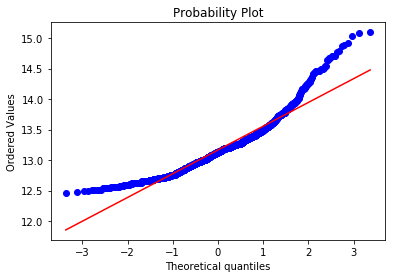

In [39]:
grouped_df['Value']=np.log(grouped_df['Value'])
sns.distplot(grouped_df['Value'],fit=norm)
fig=plt.figure()
res=stats.probplot(grouped_df['Value'],plot=plt)

In [40]:

print("Skewness: %f" % grouped_df['Value'].skew())
print("Kurtosis: %f" % grouped_df['Value'].kurt())

Skewness: 1.203352
Kurtosis: 2.357252


Logtransformation has greatly reduced the skewness. Let's see if there is any outlier. The data point will be considered as outliers if its z score is greater than three.

C:\Users\helen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


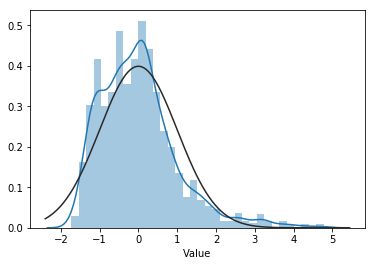

<Figure size 432x288 with 0 Axes>

In [41]:
grouped_df['Value']=StandardScaler().fit_transform(grouped_df['Value'][:,np.newaxis])
sns.distplot(grouped_df['Value'],fit=norm)
fig=plt.figure()

C:\Users\helen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 0.674409
Kurtosis: 0.391779


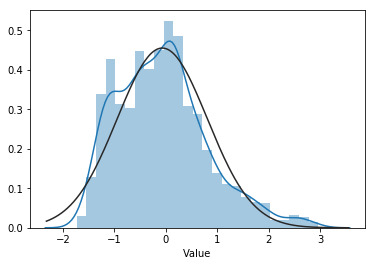

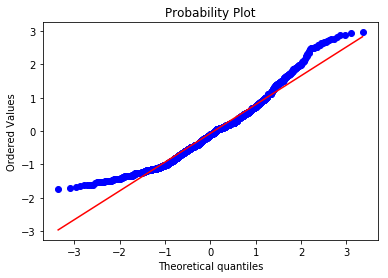

In [42]:
#dropping the outlier 
grouped_df=grouped_df[grouped_df.Value<3]

#Plotting the distribution again
sns.distplot(grouped_df['Value'],fit=norm)
fig=plt.figure()
res=stats.probplot(grouped_df['Value'],plot=plt)

print("Skewness: %f" % grouped_df['Value'].skew())
print("Kurtosis: %f" % grouped_df['Value'].kurt())

Now we have reduced the skewness and kurtosis and the data seems a lot more normally distributed, we shall now move on to explore its relationship with our candidate features.

Skewness: 0.288681
Kurtosis: -0.158263


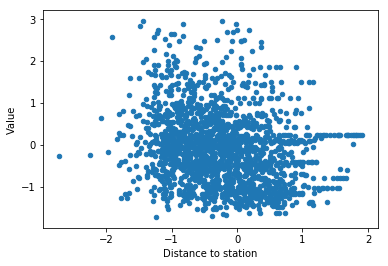

In [43]:
##Examining our first variable：Distance to Station
grouped_df['Distance to station']=np.log(grouped_df['Distance to station'])
var='Distance to station'
data=pd.concat([grouped_df['Value'],grouped_df['Distance to station']],axis=1)
data.plot.scatter(x=var,y='Value')

print("Skewness: %f" % grouped_df[var].skew())
print("Kurtosis: %f" % grouped_df[var].kurt())

In [44]:
from scipy.stats import linregress
linregress(grouped_df['Value'],grouped_df[var])

LinregressResult(slope=-0.17426126742054926, intercept=-0.24722099678928589, rvalue=-0.21692284660805794, pvalue=2.340117754964424e-20, stderr=0.01861883763802381)

Seems like our first candidate variable is weakly and negatively associated with the housing price, we shall include it in our model.

Skewness: -0.694097
Kurtosis: -0.042379


LinregressResult(slope=0.25463880349955337, intercept=9.542010489203642, rvalue=0.3915826538192884, pvalue=3.652040757425847e-66, stderr=0.01420625575076472)

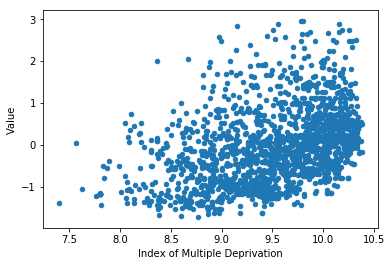

In [45]:
##Examining the second variable：Index of Multiple Deprivation
grouped_df['Index of Multiple Deprivation']=np.log(grouped_df['Index of Multiple Deprivation'])
var='Index of Multiple Deprivation'
data=pd.concat([grouped_df['Value'],grouped_df[var]],axis=1)
data.plot.scatter(x=var,y='Value')


print("Skewness: %f" % grouped_df[var].skew())
print("Kurtosis: %f" % grouped_df[var].kurt())


linregress(grouped_df['Value'],grouped_df[var])

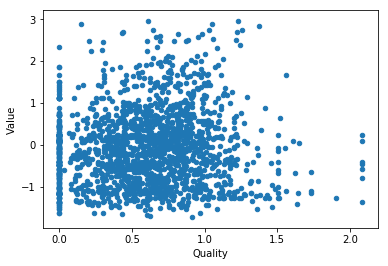

In [46]:
#Now move on the third candidate variable:Quality rating
grouped_df['Quality']=np.log(grouped_df['Quality'])
var='Quality'
data=pd.concat([grouped_df['Value'],grouped_df[var]],axis=1)
data.plot.scatter(x=var,y='Value')


In [47]:
print("Skewness: %f" % grouped_df[var].skew())
print("Kurtosis: %f" % grouped_df[var].kurt())

linregress(grouped_df['Value'],grouped_df[var])


Skewness: 0.299110
Kurtosis: 0.171846


LinregressResult(slope=0.026379471806030147, intercept=0.5876537876664977, rvalue=0.06004796576040922, pvalue=0.011371166340648218, stderr=0.010411339124433285)

The quality variable did not appear to be associated with the price value due to its extremely low correlation and the lack of statistical significance. Therefore, we shall not include it in our model.

As shown above, the quality rating failed to provide any meaningful information about the price value, therefore, it will not be included in the modelling stage. Taken together, among the three candiate variables, only the depreivation index is retained as the feature variable. We shall now move on to source venue data using Foursquare API.

In [48]:
def getNearbyVenues(price,deprivation_index,distance_to_station,latitude,longitude,radius=500):
    
    venues_list=[]
    for price,index,distance,lat, lng in zip(price,deprivation_index,distance_to_station,latitude,longitude):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        for i in range(3):
            response = requests.get(url).json()['response']
            
            if response.get('groups'):
                results = response['groups'][0]['items']
                break
                
            print('repeating')
            
        if not response.get('groups'):
            continue
                
        venues_list.append([(
            price,
            index,
            distance,
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 
                  'Price',
                  'Deprivation_index',
                        'Distance',
                  'District Latitude', 
                  'District Longitude',
                  'Venue',
                  'Venue ID', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



In [49]:


    
CLIENT_ID='JRMAOQ23QH2AR2G01QNCFARI5IKTISMVT2PHM3D0DXKGHF5N'
CLIENT_SECRET='M1P2CGJKPR0J1N1GMUV0P5CH1BGLFD3SHIPP4YTOFQ4NTATE'
VERSION = '20190222'
LIMIT=100

    

In [50]:
London_venues=getNearbyVenues(price=grouped_df['Value'],
                              deprivation_index=grouped_df['Index of Multiple Deprivation'],
                              distance_to_station=grouped_df['Distance to station'],
                              latitude=grouped_df['Latitude'],
                              longitude=grouped_df['Longitude'])

repeating
repeating
repeating


There seem to be quite a lot of venue categories, it is likely that not all of them are relevant in predicting housing price categories. We will use Random Forest for feature selection. Such process will be discussed in more details later at the modelling stage.

In [52]:
len(London_venues['Venue Category'].unique())

454

In [53]:
London_venues

,Price,Deprivation_index,Distance,District Latitude,District Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,0.239668,9.889642,1.811562,51.29,0.06,Shampan At The Spinning Wheel,4edb85d6e300851bfad7955e,51.292974,0.056939,Indian Restaurant
1,0.239668,9.889642,1.811562,51.29,0.06,Westerham Heights,59b435445a2c9107744a89d2,51.289698,0.057968,Scenic Lookout
2,0.239668,9.889642,1.811562,51.29,0.06,Biggin Hill Saddlery & Gun Room,5308c801498ebfb5ae1d784d,51.288883,0.058852,Gun Shop
3,-0.795804,10.053200,1.619388,51.30,0.02,Pinky & Perky Manor,5843fe72d0bb3e5513d37dd9,51.303328,0.018773,Pizza Place
4,0.018522,9.911543,1.776011,51.30,0.04,dads racing yard!,53143545498ee35867c79bcc,51.300921,0.040257,Stables
5,0.018522,9.911543,1.776011,51.30,0.04,daddys racing yard,531cf488498e18f9f5e34d97,51.304068,0.039562,Stables
6,0.239668,9.889642,1.811562,51.30,0.05,Aperfield Inn,4f82ecdce4b01cf824d0c54b,51.301912,0.052481,Restaurant
7,-0.795804,10.011532,1.567123,51.31,0.03,Waitrose & Partners,4bb78b7398c7ef3bf4f02f02,51.309054,0.036832,Supermarket
8,-0.795804,10.011532,1.567123,51.31,0.03,Biggin Hill Memorial Pool,5145a9e6e4b0ff6e2f82ad53,51.312124,0.034593,Pool
9,-0.795804,10.011532,1.567123,51.31,0.03,Tesco,4bb78bd6b35776b072c0c701,51.310469,0.036693,Grocery Store


## Data Preparation for Machine Learning 
- onehot-encoding for categorical variables (nearby venue categories)
- converting housing price (numerical) to categorical variables
- split data into features and lables
- split data into training and testing sets

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#onehot_encoding: converting categorical variables into dummy variables
ld_onehot=pd.get_dummies(London_venues[['Venue Category']],prefix="",prefix_sep="")
#Inserting back the relevant columns
ld_onehot.insert(loc=0, column='Deprivation_index',value=London_venues['Deprivation_index'])
ld_onehot.insert(loc=0,column='Distance to station',value=London_venues['Distance'])
ld_onehot.insert(loc=0,column='Venue Latitude',value=London_venues['Venue Latitude'])
ld_onehot.insert(loc=0,column='Venue Longitude',value=London_venues['Venue Longitude'])
ld_onehot.insert(loc=0,column='Price',value=London_venues['Price'])

In [56]:
#creating a new price category feature by converting the price value into categorical variable by qualtiles
PriceCategory=pd.qcut(London_venues['Price'],3,labels=['low','medium','high'])
ld_onehot.insert(loc=0,column='PriceCategory',value=PriceCategory)

In [98]:
#Labels are the price categories we want to predict
y_1=ld_onehot['PriceCategory']
#The rest columns (excluding the Price columns) are feature variables
x_1=ld_onehot.iloc[:,2:]

The data is splitted into training and testing set on a 72:25 ratio. An alternative to such approach is to split the data into taning, validation and testing sets. Such an approach will drastically reduce the sample size that is used for model building. This might negatively influence the model performance of the non-parametric models (i.e. KNN and RandomForest) at the modelling stage. 

However, without the validation set, hyper-parmeters tuning is needed to be conducted on the testing set which runs the risk of overfitting. Such limitation is overcome by the use of 5-fold cross-validation where training set is split into five smaller sets. Four of which will be used as the training data and the resulting model is validated on the remaining fold. Such process is iterated five times and average accuracy score is computed for selecting the best hyper-parameters.  The rationale of using accuracy score as the evaluation criteria for model training is provided in the next section.

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_1,y_1,test_size=0.25,random_state=4)

#Checking the shapes of the resulting datasets
print('X_train Shape:',x_train.shape)
print('y_train Shape:',y_train.shape)
print('X_test Shape:',x_test.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (13328, 458)
y_train Shape: (13328,)
X_test Shape: (4443, 458)
y_test Shape: (4443,)


# Modelling Stage: 

## Baseline Accuracy:
1.Establish baseline prediction accuracy : Null Accuracy

## Model Building:
2.Apply RandomForest classifier to the training set using 5-fold cross-validation method

3.Calculate the mean accuracy score 

4.Compute the feature importance score

5.Remove redundant features 

6.Apply the RandomForest classifier again using the important features

7.Scoring the RandomFroest classifier again using cross-validation.

8.Apply K-NearestNeighbours and select the best K with GridSearchCV

9.Apply SupportVectorMachine and select the best C value

10.Apply multiclas logistic regression and select the best C value

## Model Evaluation:
11.Apply the above models to the test set

12.Generate confusion matrix for each model 

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt


Establishing null accuracy: The accuracy that could be achieved by always predicting the most frequent class

In [61]:
null_accuracy=y_test.value_counts().head(1)/len(y_test)
null_accuracy

low    0.338285
Name: PriceCategory, dtype: float64

In [62]:
#Checking the class balance
ld_onehot['PriceCategory'].value_counts()

medium    5941
low       5932
high      5898
Name: PriceCategory, dtype: int64

As shown above, the three classes are quite balanced. Accuracy score works well on balanced data. Therfore, it is appropriate to be used as the scoring method for cross-validation. 
ROC curve is not provided as it is most suitable for binary classification problems.

In [101]:
#Converting the training set into arrays
x_train_1=np.array(x_train)
y_train_1=np.array(y_train)

#Normalising feature variables
x_train_1=StandardScaler().fit_transform(x_train_1)

The Random Forest algorithm is selected for feature selection and classification instead of Decision Tree. This is because although decision tress are more interpretable, they are prone to overfitting and tend to have lower predictive accuracy. Random Forest overcome this problem by splitting the bootstrapped trainning sample using random subset of predictors as split candidates.


In [68]:
#Randomforest __Cross-validation with all feature variables
rf=RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf_accuracy_1=cross_val_score(rf,x_train_1,y_train_1,cv=5,scoring='accuracy').mean()
rf.fit(x_train_1,y_train_1)
rf_accuracy_1

0.9684119492826323

In [151]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=rf,step=1,cv=5,scoring='accuracy')
rfecv=rfecv.fit(x_train_1,y_train_1)
print('Optimal number of features:', rfecv.n_features_)

In [69]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
index_list=[]
for train,__ in kf.split(x_train_1,y_train_1):
    rf.fit(x_train_1[train,:],y_train_1[train])
    index_list.append(rf.feature_importances_.tolist())

Feature selection is carried out using the embedded method, where Random Forest's inbuilt feature importance measure is used to compare the relative contribution of each predictor. The importance value of each predictor is the total amount that Gini index is decreased by splitting over the predictor, averaged over all the trees. A large value indicates an important predictor.

In [149]:
#Generate a dataframe with the feature importance value array
feature_importances = pd.DataFrame({'fold1':index_list[0],
                                   'fold2':index_list[1],
                                   'fold3':index_list[2],
                                   'fold4':index_list[3],
                                   'fold5':index_list[4]})
feature_labels=ld_onehot.iloc[:,2:].columns
feature_importances=feature_importances.set_index(feature_labels)
feature_importances['Average_imp']=feature_importances.mean(axis=1)
feature_labels=ld_onehot.iloc[:,2:].columns
feature_importances.Average_imp.sort_values(ascending=False).head(10)          

Venue Longitude         0.309154
Venue Latitude          0.205520
Deprivation_index       0.176735
Distance to station     0.153510
Park                    0.003367
Fast Food Restaurant    0.003133
Pub                     0.003001
Café                    0.002787
Bus Stop                0.002679
Grocery Store           0.002666
Name: Average_imp, dtype: float64

In [154]:
feature_importances.Average_imp.sort_values(ascending=True).head(25) 

Pool Hall               0.000000e+00
Austrian Restaurant     0.000000e+00
Knitting Store          0.000000e+00
Fish Market             0.000000e+00
Gaming Cafe             0.000000e+00
Fire Station            0.000000e+00
Udon Restaurant         0.000000e+00
Non-Profit              0.000000e+00
Animal Shelter          0.000000e+00
Pet Service             0.000000e+00
Brasserie               0.000000e+00
Astrologer              0.000000e+00
Buddhist Temple         0.000000e+00
Theme Park              0.000000e+00
Supplement Shop         0.000000e+00
Afghan Restaurant       0.000000e+00
Adult Boutique          0.000000e+00
Taiwanese Restaurant    0.000000e+00
Sauna / Steam Room      0.000000e+00
Tailor Shop             0.000000e+00
Cigkofte Place          0.000000e+00
Cemetery                0.000000e+00
Bulgarian Restaurant    0.000000e+00
Water Park              0.000000e+00
Mamak Restaurant        7.166466e-07
Name: Average_imp, dtype: float64

As we could see, the feature importance values dropped quite significantly towards the end. We shall an artibrary cut-off threshold to remove the redundant variables. 

In [82]:
feature_importances=feature_importances[feature_importances['Average_imp']>0.0015]

In [83]:
feature_importances.shape

(26, 6)

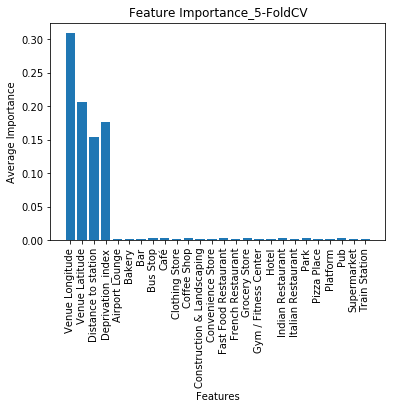

In [132]:
plt.figure()
plt.bar(feature_importances.index,feature_importances['Average_imp'])
plt.xticks(feature_importances.index,rotation='vertical')
plt.ylabel('Average Importance')
plt.xlabel('Features')
plt.title('Feature Importance_5-FoldCV')
plt.show()

In [102]:
#Modifying training and testing dataset accordingly.
feature_list=feature_importances.reset_index()['index']
len(feature_list)
x_train_imp=x_train[feature_list]
x_test_imp=x_test[feature_list]
x_train_2=np.array(x_train_imp)
x_test_2=np.array(x_test_imp)

In [104]:
#Cross-validating the randomforest with the new selected features
rf.fit(x_train_2,y_train_1)
rf_accuracy_2=cross_val_score(rf,x_train_2,y_train_1,cv=5,scoring='accuracy').mean()
rf_accuracy_2

0.990620937565063

The model performance increased by over 2% as result of feature selection. Now we will apply KNN, SVM and Logistic regression to the selected feature sets.

In [105]:
#Using GridSearchCV to selct the number of K
grid_params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
gs=GridSearchCV(KNeighborsClassifier(),
               grid_params,
               verbose=1,
                scoring='accuracy',
               cv=5)
knn=gs.fit(x_train_2,y_train_1)

#Accuracy score_KNN
print(knn.best_params_)
print(knn.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_neighbors': 1}
0.8404861944777912


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.3s finished


In [110]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

Unlike KNN and RandomForest, SVM is intrinsically two-class. There are two ways in which we could modify the algorithims for multi-class prediction:the SVC 'one-against-one' approach and the LinearSVC 'one-vs-the rest' approach. We will run both approach to compare the model performance.

In [ ]:
#SVC_one-aginst-the rest_Tuning the regulation parameter with GridSearchCV
param_grid={'C':[0.1,1,10,100]}
gs_svc=GridSearchCV(svm.LinearSVC(),
                   param_grid,
                   scoring='accuracy',
                   cv=5)
svc_2=gs_svc.fit(x_train_2,y_train_1)
#Best C value
print(svc_2.best_params_)
#Mean accuracy score of the selected C 
print(svc_2.best_score_)

In [122]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [131]:
#SVC_one-aginst-one_Tuning the regulation parameter with GridSearchCV

param_grid={'C':[0.1,1,10,100]}
gs_svc=GridSearchCV(SVC(decision_function_shape='ovo'),
                   param_grid,
                   scoring='accuracy',
                   cv=5)
svc_1=gs_svc.fit(x_train_2,y_train_1)
#Best C value
print(svc_1.best_params_)
#Mean accuracy score of the selected C 
print(svc_1.best_score_)



{'C': 100}
0.5974639855942377


In [111]:
#SVC_one-aginst-the rest_Tuning the regulation parameter with GridSearchCV
param_grid={'C':[0.1,1,10,100]}
gs_svc=GridSearchCV(svm.LinearSVC(),
                   param_grid,
                   scoring='accuracy',
                   cv=5)
svc_2=gs_svc.fit(x_train_2,y_train_1)
#Best C value
print(svc_2.best_params_)
#Mean accuracy score of the selected C 
print(svc_2.best_score_)


{'C': 0.1}
0.47118847539015607


For our case, the one-against-one approach yielded better accuracy score. Therefore, it is selected for the later model comparison stage.

In [142]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss

The default setting of Logistic regression is binary. For multi-class prediction, we need to use set our multi-class parameter to 'multinomial'

In [145]:
lg= LogisticRegressionCV(cv=5,multi_class='multinomial')
lg=lg.fit(x_train_2,y_train_1)
lg_accuracy_score=cross_val_score(lg,x_train_2,y_train_1,cv=5,scoring='accuracy').mean()
lg_accuracy_score

0.49069702487576905

Despite the fact that the accuracy score of our logistic regression is quite low, we will not adjust the probability threshold as the dataset is quite balanced.

Now we have built and tuned all three classification model using cross-validation on the training set. We shall now examine the generalisability of model performance on the unseen data: the testing set. Both accuracy score and classification report will be printed for each model.

In [628]:
#applying RandomForest to the test set
yhat_rf=gs.predict(x_test_2)
print('Accuracy Score_rf:%2f'%metrics.accuracy_score(y_test_1,yhat_rf))
print(classification_report(y_test_1,yhat_rf))

Accuracy Score_rf:0.991885
             precision    recall  f1-score   support

       high       1.00      0.99      1.00      1476
        low       0.99      0.99      0.99      1520
     medium       0.99      0.99      0.99      1440

avg / total       0.99      0.99      0.99      4436



In [632]:
#applying KNN to the test set
yhat_knn=knn.predict(x_test_2)
print('Accuracy Score_knn:%2f'%metrics.accuracy_score(y_test_1,yhat_knn))
print(classification_report(y_test_1,yhat_knn))

Accuracy Score_knn:0.878269
             precision    recall  f1-score   support

       high       0.89      0.91      0.90      1476
        low       0.90      0.87      0.88      1520
     medium       0.85      0.85      0.85      1440

avg / total       0.88      0.88      0.88      4436



In [136]:
#applying SVM to the test set
yhat_svm=svc_1.predict(x_test_2)
print('Accuracy Score_svm:%2f'%metrics.accuracy_score(y_test,yhat_svm))
print(classification_report(y_test,yhat_svm))

Accuracy Score_svm:0.613774
             precision    recall  f1-score   support

       high       0.57      0.82      0.67      1445
        low       0.78      0.56      0.65      1503
     medium       0.54      0.47      0.50      1495

avg / total       0.63      0.61      0.61      4443



In [146]:
#applying Logistic Regression to the test set
yhat_lg=lg.predict(x_test_2)
print('Accuracy Score_lg:%2f'%metrics.accuracy_score(y_test,yhat_lg))
print(classification_report(y_test,yhat_lg))

Accuracy Score_lg:0.488859
             precision    recall  f1-score   support

       high       0.50      0.59      0.54      1445
        low       0.52      0.56      0.54      1503
     medium       0.43      0.32      0.36      1495

avg / total       0.48      0.49      0.48      4443



## Results Interpretation and Discussion

With regard to the first aim of the study, the prediction performance of all the above models exceeded the null acuracy on both cross-validation set and the test set, with Random Forest model yielded the highest accuracy and F1 score. This is consistent with findings of the international literature that examined housing prices in Onondaga County (Yoo, Jungho & Wagner, 2012), Saint-Petersburg (Antipov & Pokryshevskaya, 2012) and Santiago (Masías et al., 2016). The results of this case study strengthened the evidence for the superior predictive performance of RF for explaining variances in housing price. However, the high accuracy score is at the expense of its interpretability. The only way to inspect the predictive power of each feature variable is through the variable importance measure. 


The results of this measure is used as the evaluation criteria for feature selection. An alternative to such an approach is Recursive Feature Elimination which eliminates worst performing features on a model one after one until the best subset of features are known. In sklearn such an approach is combined with cross-validation which also computes the best number of selected features. Such an approach seems superior to the arbitrary cut-off point adopted in the current study. However, since it is computationally very expensiv, Recursive Feature Elimination is not suitable for large number of features which is the case of the current study. Therefore, the use of Random forest feature importance measure is justified.

Despite its optimal performance, the KNN model yielded the best acuracy score when K=1, which is often considred as a low bias but very high variance model, which means it might be sensitive to outliers  which consequently lead to overfitting. However, in our case, the outliers are largely removed, which might potentially explain the higher accuracy and f1 score generated from the test set. It is also worth noticing that the linear SVM and logistic regression yielded significantly lower accuracy and f1 score on both trainning and testing sets. Indeed, the accuracy scores were only about 15% higher than the null accuracy. A possible explanation is that such drastic differences among models are a result of model assumption violations. Both Linear SVM and logistic regression are linear classifiers, it is possible that the decision boudary of the current dataset is non-linear as the both non-linear classifiers (KNN and RandomForest) performed optimally. Such explanation was tested by running the SVM with non-linearn kernel. However, due to the relatively large size of data and the nature of SVM, the algorithim training did not finish within 3 hours and the notebook crashed as a result. This indeed has been considered as one of the major drawbacks of SVM with non-linear kernels. No futher investigation attempts were made as its computation time is not justified by the reasonably good performance that is already obtained using random forest and KNN models. Therefore, the above non-linearity explanation are only probable.

Regarding the second aim of the study, the housing price of a given set of London geographical coordinates could be predicted based on its distance to the station, deprivation index, and the venue categories and geograpical coordinates of its nearby properties. However, the predictors differ in relative importance. The latitudes and longitudes of nearby venues are the top two variables that are most discerning between classes, which are then followed by the deprivation index and distance to station. Venue categories data played a relatively insignificant role in predicting housing price categories. There are two possible explanations for this result. 

Firstly, this could be attributed to weak relationship between housing price categories and its nearby venue categories. Secondly,the venue category data is limited to its functional categories, which provide little information about its associated expenditure level, which could potentially be a better predictor of housing price categories. This information could be sourced using the 'get venue details' query, however, due to the relatively large data size, the number of API calls will exceed the quota of the current starndard Foursquare developer account. Therefore, future research with the additional focus on nearby venue categories that reflect household expenditure level is encouraged.

## References
Basu, S., & Thibodeau, T. G. (1998). Analysis of spatial autocorrelation in house prices. The Journal of Real Estate Finance and Economics, 17(1), 61-85.

Islam, K. S., & Asami, Y. (2009, July). Housing market segmentation: a review. In Review of Urban & Regional Development Studies: Journal of the Applied Regional Science Conference (Vol. 21, No. 2‐3, pp. 93-109). Melbourne, Australia: Blackwell Publishing Asia.

Margulis, H. L. (1998). Predicting the growth and filtering of at-risk housing: Structure ageing, poverty and redlining. Urban Studies, 35(8), 1231-1259.

